In [279]:
from numpy import ones_like, cos, pi, sin, allclose
import numpy as np
import matplotlib.pyplot as plt

Code to understand how to the compute Fourier coefficients of a function in python. 
Most is taken from: https://stackoverflow.com/questions/4258106/how-to-calculate-a-fourier-series-in-numpy

We start by computing the coefficients using the python fft function

In [280]:
# First, the periodic function from which we want to compute the Fourier coefficients

T = 1  # period

#select a function you want to analyze

# def f(t):
#     return np.cos(2*pi*3*t) + (np.sin(2*pi*t))**2

# def f(t,sigma =2,ell=.2):
#     return sigma**2 * np.exp( -2*(np.sin(np.pi*np.abs(t)))**2 / ell**2 )


def f(t, p=.5):
    return 2* (t / p  - np.floor(.5 +t/p))

# number of Fourier coefficients to compute (it will be N_chosen + 1)
N_chosen = 2**5

n_sample = 2*N_chosen  # number of points in the grid
t, dt = np.linspace(0, T, n_sample,  retstep=True)  # time grid


#check if the samples are at least twice the number of Fourier components (Nyquist-Shannon theorem)
if n_sample < 2 * N_chosen:
    raise ValueError('The number of samples must be at least twice the number of Fourier components')



In [281]:
n_sample

64

 Discrete Fourier transform

 $C_k =  \sum_{m=0}^{n-1} x_m \exp\left\{-2\pi i{mk \over n}\right\}
   \qquad k = 0,\ldots,n-1.$


Inverse Fourier transform 

$$ x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \exp\left\{2\pi i{kn \over N}\right\} $$

In [282]:
#Here is a way to compute Fourier coefficients using numpy.fft.rfft

c = np.fft.fft(f(t)) * T   / n_sample    # Fourier coefficients scaled by the number of samples

In [283]:
c.size

64

In [284]:
np.fft.ifft(c).size

64

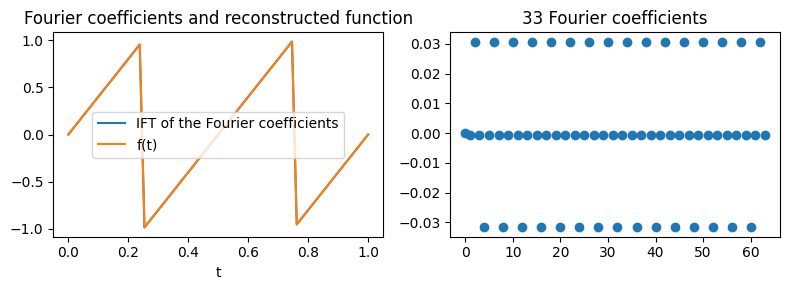

In [285]:
#plot the inverse Fourier transform of the Fourier coefficients, and the Fourier coefficients

#we plot two subplots, one with the function and the reconstructed function, and one with the Fourier coefficients:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.plot(t, np.fft.ifft(c * n_sample / T )  , label="IFT of the Fourier coefficients")  #times 2! because sum from 0
ax1.plot(t, f(t), label="f(t)")
ax2.plot(c, 'o')
ax1.set_xlabel("t")
ax1.set_title("Fourier coefficients and reconstructed function")
ax2.set_title('%i Fourier coefficients' %(N_chosen+1))
ax1.legend()
plt.tight_layout()


Now we compute the coefficients manually

$$c_n = \frac{1}{T} \int_{-T/2}^{T/2} f(x) e^{-\frac{2 \pi i n x }{T}} \ dx $$   

$$  f(t) = \sum_{n=-\infty}^{\infty} c_n e^{\frac{2 \pi i n t }{T}}  $$

In [286]:
# use scipy integrate to integrate a function from ) to T
from scipy.integrate import quad


In [287]:
# coeff = np.zeros(2*N_chosen+1, dtype=complex)

# #save Fourier coefficients in a vector
# for n in range(-N_chosen,N_chosen+1):
   
#    def y_aux(t):
#       return f(t) * np.exp(-1j*2*n*np.pi*t/T)

#    coeff[n] = quad(lambda t: y_aux(t), 0, T)[0]

   
# # c = np.array([coeff(n) for n in range(-N_chosen,N_chosen+1)])


# # function computed through coefficients, evaluated at time t!

# y2= np.zeros(t.size, dtype=complex)

# for s in range(t.size):

#    y_aux= 0

#    for n in range(-N_chosen,N_chosen+1):
#       y_aux = y_aux + coeff[n]*np.exp(1j*2*n*np.pi*s/T)
   
#    y2[s]= y_aux



def cn(n):
   return quad(lambda t: f(t) * np.exp(-1j*2*n*np.pi*t/T), 0, T)[0] / T
   
coeff = np.zeros(2*N_chosen+1, dtype=complex)
coeff[:N_chosen+1] = np.array([cn(i) for i in range(0,N_chosen+1)])
coeff[N_chosen+1:] = np.array([cn(i) for i in range(-N_chosen,0)])


def f_Fourier2(t, coeff):
   aux1 =np.arange(N_chosen+1)
   aux2 = np.arange(-N_chosen,0)
   aux = np.concatenate((aux1,aux2))
   f = (coeff * np.exp(1j*2*aux*np.pi*t/T)).sum()
   return f   
   

# def f_Fourier2(t, Nh, f_evaluated=f(t)):
#    f = np.array([2*cn(i)*np.exp(1j*2*i*np.pi*t/T) for i in range(0,Nh+1)])
#    return f.sum()

y2 = np.array([f_Fourier2(s,coeff).real for s in t])


Interval (0,T)??

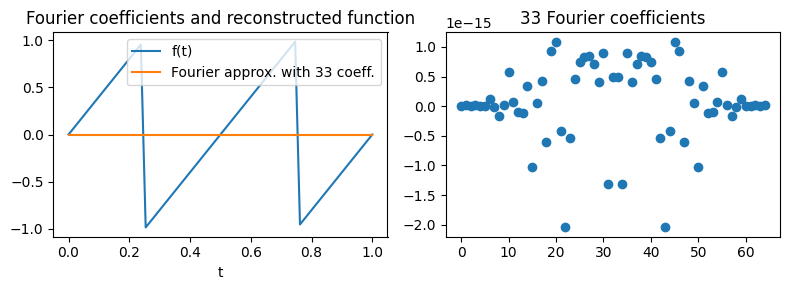

In [288]:
#we plot two subplots, one with the function and the reconstructed function, and one with the Fourier coefficients:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

ax1.plot(t, f(t), label="f(t)")
ax1.plot(t, y2, label="Fourier approx. with %d coeff." % (N_chosen+1))
ax2.plot(coeff, 'o')
ax1.set_xlabel("t")
ax1.set_title("Fourier coefficients and reconstructed function")
ax2.set_title('%i Fourier coefficients' %(N_chosen+1))
ax1.legend()
plt.tight_layout()

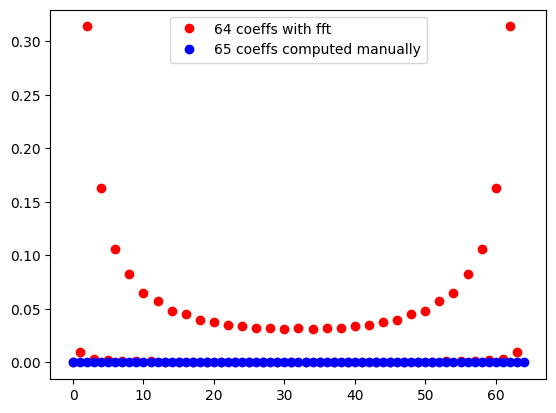

In [289]:
#Compare the coefficients obtained with the two methods:

plt.plot( np.abs(c ), 'o', color='r', label='%d coeffs with fft'% c.size )
plt.plot( np.abs(coeff), 'o', color='b', label='%d coeffs computed manually' % coeff.size)
plt.legend()

In [290]:
#check if the coefficients are the same (up to numerical precision)
allclose(c, coeff[:c.size], rtol=1e-2, atol=1e-1)   
#MALE


False

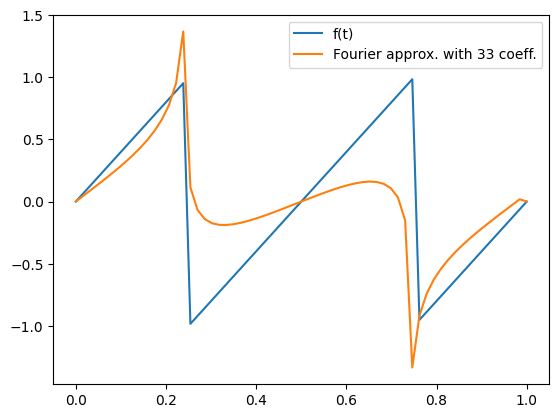

In [291]:
#we reconstruct the function with the Fourier basis, using coefficients computed with fft

def f_Fourier3(t, c):
   aux =np.arange(c.size)
   f = (c * np.exp(1j*2*aux*np.pi*t/T)).sum()
   return f   

f_reconstructed =  np.array([f_Fourier3(s,c).real for s in t])

plt.plot(t, f(t), label="f(t)")
plt.plot(t, f_reconstructed, label="Fourier approx. with %d coeff." % (N_chosen+1))
plt.legend()


Or we can look at the other form of Fourier coefficient

$f(t) = a_0 + a_1 \cos(\frac{2 \pi  t}{T}) + a_7 \cos(\frac{2 \pi 7 t}{T}) + b_4 \sin(\frac{2 \pi 4 t}{T}) $

In [292]:
# #Here is a way to compute Fourier coefficients using numpy.fft.rfft

# def fourier_series_coeff_numpy(f, T, N, return_complex):
#     """Calculates the first 2*N+1 Fourier series coeff. of a periodic function.

#     Given a periodic, function f(t) with period T, this function returns the
#     coefficients a0, {a1,a2,...},{b1,b2,...} such that:

#     f(t) ~= a0/2+ sum_{k=1}^{N} ( a_k*cos(2*pi*k*t/T) + b_k*sin(2*pi*k*t/T) )

#     If return_complex is set to True, it returns instead the coefficients
#     {c0,c1,c2,...}
#     such that:

#     f(t) ~= sum_{k=-N}^{N} c_k * exp(i*2*pi*k*t/T)

#     where we define c_{-n} = complex_conjugate(c_{n})

#     Refer to wikipedia for the relation between the real-valued and complex
#     valued coeffs at http://en.wikipedia.org/wiki/Fourier_series.

#     Parameters
#     ----------
#     f : the periodic function, a callable like f(t)
#     T : the period of the function f, so that f(0)==f(T)
#     N_max : the function will return the first N_max + 1 Fourier coeff.

#     Returns
#     -------
#     if return_complex == False, the function returns:

#     a0 : float
#     a,b : numpy float arrays describing respectively the cosine and sine coeff.

#     if return_complex == True, the function returns:

#     c : numpy 1-dimensional complex-valued array of size N+1

#     """
#     # From Shanon theoreom we must use a sampling freq. larger than the maximum
#     # frequency you want to catch in the signal.
#     f_sample = 2 * N
#     # we also need to use an integer sampling frequency, or the
#     # points will not be equispaced between 0 and 1. We then add +2 to f_sample
#     t, dt = np.linspace(0, T, f_sample + 2, endpoint=False, retstep=True)

#     y = np.fft.rfft(f(t)) / t.size

#     if return_complex:
#         return y
#     else:
#         y *= 2
#         return y[0].real, y[1:-1].real, -y[1:-1].imag

In [293]:

# return_complex = True

In [294]:
# #To plot the reconstructed function  from the Fourier coefficients c (complex!):

# def f_Fourier(t, c, Nh):
#     f = np.array([2*c *np.exp(1j*2*n*np.pi*t/T) for n in range(1,Nh+1)])
#     return f.sum()


# t = np.arange(0,T,.03)
# y = np.array([f_Fourier(s,c,N_chosen).real for s in t])

# plt.plot(t, f(t), label="f(t)")
# plt.plot(t, y, label="Fourier approx. with %d coeff." % N_chosen)
# plt.legend()

In [295]:

# if return_complex:
#     c = fourier_series_coeff_numpy(f, T, N_chosen, return_complex)
# else:
#     a0, a, b = fourier_series_coeff_numpy(f, T, N_chosen, return_complex)

# # we have as expected that
# # assert allclose(a0, 4)
# # assert allclose(a, [2, 0, 0, 0, 0, 0, -3, 0, 0, 0])
# # assert allclose(b, [0, 0, 0, -1, 0, 0, 0, 0, 0, 0])


In [296]:
# #Let's plot the Fourier coefficients:

# if return_complex:
#     plt.plot(np.arange(0,N_chosen+2), c, 'o', color='r', label='c coeffs')
#     plt.legend()
# else:
#     plt.plot(np.arange(1,N_chosen+1), a, 'o', color='r', label='a coeffs')
#     plt.plot(np.arange(1,N_chosen+1), b, 'o', color='g', label='b coeffs')
#     plt.plot(a0, 'o', color='k',label='a0 coeff')
#     plt.legend()
    


In [297]:
# #plot the inverse Fourier transform of the Fourier coefficients:
# t = np.arange(0,T,.03)
# plt.plot(t, np.fft.irfft(c, len(t)) , label="inverse Fourier transform of the Fourier coefficients")
# plt.plot(t, f(t), label="f(t)")
# plt.legend()